In [1]:
#Data manipulation
import pandas as pd
import numpy as np

#Data visualization
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation

#Forecasting
import statsmodels.api as sm

#Notebook configs
%matplotlib inline 
sns.set(color_codes=True)

# Getting the data and displaying the variables

In [2]:
#Getting data and displaying dataframe head
df = pd.read_csv("TFP.csv")
# To display the top 5 rows
df.head(5)

,isocode,year,rtfpna
0,USA,1950,0.617148
1,USA,1951,0.629588
2,USA,1952,0.638451
3,USA,1953,0.651858
4,USA,1954,0.646179


*rtfpna*: Total Factor Productivity at constant national prices (description from attached PDF document.) 

 # 1. Exploratory data analysis

## 1.1. Data integrity assessment

In [3]:
#Distinct countries in dataset
df.isocode.unique()

array(['USA', 'CAN', 'MEX'], dtype=object)

In [4]:
#Year range in dataset
print(f'First Year: {df.year.min()}\nLast year: {df.year.max()}')

First Year: 1950
Last year: 2011


The dataset contains 62 years and 3 distinct countries, so we should expect 186 rows if there are no gaps in data.

In [5]:
#Verying number of rows
df.count()

isocode    186
year       186
rtfpna     186
dtype: int64

In [6]:
#Checking for duplicate rows
duplicate_rows_df = df[df.duplicated()]
print(f"Duplicate rows: {duplicate_rows_df.shape}")

Duplicate rows: (0, 3)


In [7]:
#Finding if there's null values.
print(df.isnull().sum())

isocode    0
year       0
rtfpna     0
dtype: int64


## 1.2. Data visualization

In [20]:
df.describe()

,year,rtfpna
count,186.000000,186.000000
mean,1980.500000,0.975614
std,17.943831,0.177538
min,1950.000000,0.617148
25%,1965.000000,0.855143
50%,1980.500000,0.995047
75%,1996.000000,1.046348
max,2011.000000,1.383718


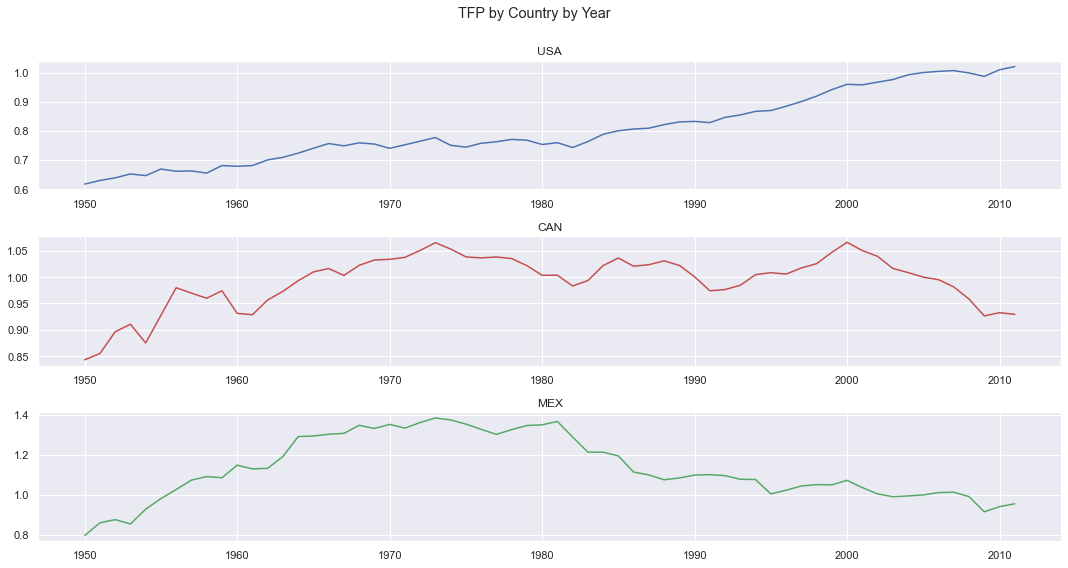

In [8]:
colors = ['b','r','g']

countries = list(df['isocode'].unique())
fig, axs = plt.subplots(len(countries))
fig.suptitle('TFP by Country by Year', y=1.05)

fig.set_figheight(7.5)
fig.set_figwidth(15)

for index, country in enumerate(countries):
    country_df = df[df['isocode']==countries[index]]
    axs[index].plot(country_df['year'], country_df['rtfpna'], c=colors[index])
    axs[index].set_title(countries[index])

fig.tight_layout()

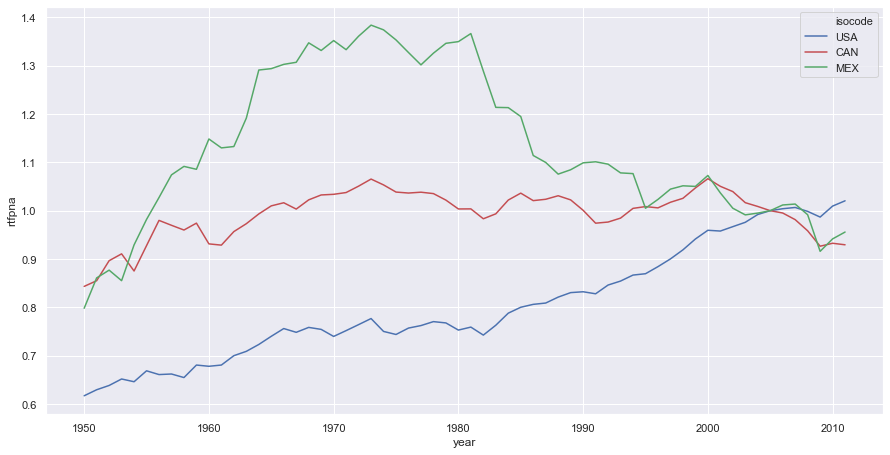

In [9]:
sns.set(rc={'figure.figsize':(15,7.5)})
sns.lineplot(x='year', y='rtfpna', hue='isocode', data=df, palette=colors)

# 2. Forecast 10 years of the series

## 2.1. USA

In [10]:
#Selecting data
country_df = df[df['isocode']=="USA"]
country_df = country_df.reset_index()
data = country_df['rtfpna']
first_year = country_df['year'].min()
country_df.head()

,index,isocode,year,rtfpna
0,0,USA,1950,0.617148
1,1,USA,1951,0.629588
2,2,USA,1952,0.638451
3,3,USA,1953,0.651858
4,4,USA,1954,0.646179


In [11]:
#Constructing our model and outputing its parameters
mod = sm.tsa.SARIMAX(data, order=(1, 0, 0), trend='c')
res = mod.fit()
print(res.summary())

                               SARIMAX Results                                
Dep. Variable:                 rtfpna   No. Observations:                   62
Model:               SARIMAX(1, 0, 0)   Log Likelihood                 178.284
Date:                Sun, 05 Jul 2020   AIC                           -350.569
Time:                        18:31:05   BIC                           -344.187
Sample:                             0   HQIC                          -348.063
                                 - 62                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0022      0.012      0.184      0.854      -0.021       0.026
ar.L1          0.9972      0.015     66.139      0.000       0.968       1.027
sigma2         0.0002   4.25e-05      3.999      0.0

c:\users\rodri\desktop\4intelligence\env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\users\rodri\desktop\4intelligence\env\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [12]:
#Forecasting
fcast = res.get_forecast(steps=10).summary_frame()

In [13]:
#Adjusting indexes to better visualization
data.index = data.index+first_year
fcast.index = fcast.index+first_year

In [14]:
#Forecast Results
fcast

rtfpna,mean,mean_se,mean_ci_lower,mean_ci_upper
2012,1.019779,0.013035,0.994230,1.045328
2013,1.019168,0.018409,0.983087,1.055250
2014,1.018559,0.022516,0.974429,1.062689
2015,1.017951,0.025963,0.967065,1.068838
2016,1.017345,0.028988,0.960531,1.074160
2017,1.016741,0.031711,0.954589,1.078893
2018,1.016139,0.034205,0.949099,1.083178
2019,1.015538,0.036516,0.943967,1.087108
2020,1.014938,0.038678,0.939130,1.090746
2021,1.014341,0.040715,0.934541,1.094140


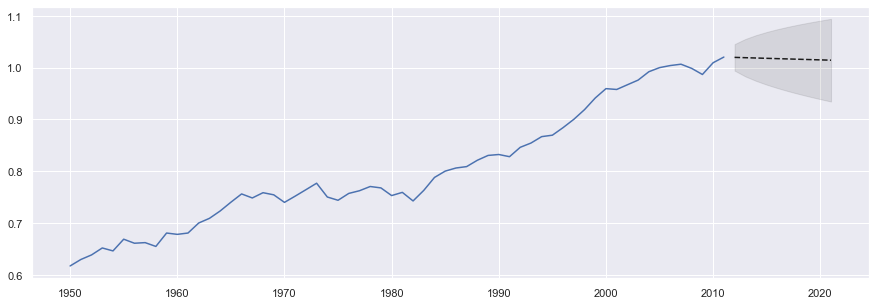

In [15]:
#Plotting the results
fig, ax = plt.subplots(figsize=(15, 5))
# Plot the data (here we are subsetting it to get a better look at the forecasts)
data.plot(ax=ax, c=colors[0])
# Plotting the forecasts
fcast['mean'].plot(ax=ax, style='k--')
ax.fill_between(fcast.index, fcast['mean_ci_lower'], fcast['mean_ci_upper'], color='k', alpha=0.1)

### Since we're done with the step by step construction of the model, for the next countries I'll be displaying only the forecast result table and the graph visualization.

## 2.2. Canada

In [16]:
#Selecting data
country_df = df[df['isocode']=="CAN"]
country_df = country_df.reset_index()
data = country_df['rtfpna']
first_year = country_df['year'].min()

#Constructing our model and outputing its parameters
mod = sm.tsa.SARIMAX(data, order=(1, 0, 0), trend='c')
res = mod.fit()
#print(res.summary())

#Forecasting
fcast = res.get_forecast(steps=10).summary_frame()

#Adjusting indexes to better visualization
data.index = data.index+first_year
fcast.index = fcast.index+first_year

#Forecast Results
fcast

rtfpna,mean,mean_se,mean_ci_lower,mean_ci_upper
2012,0.929888,0.018894,0.892858,0.966919
2013,0.930354,0.026242,0.878920,0.981787
2014,0.930802,0.031572,0.868922,0.992683
2015,0.931235,0.035821,0.861027,1.001443
2016,0.931652,0.039360,0.854508,1.008796
2017,0.932054,0.042384,0.848983,1.015125
2018,0.932441,0.045012,0.844219,1.020663
2019,0.932815,0.047323,0.840062,1.025567
2020,0.933174,0.049374,0.836403,1.029946
2021,0.933521,0.051206,0.833160,1.033883


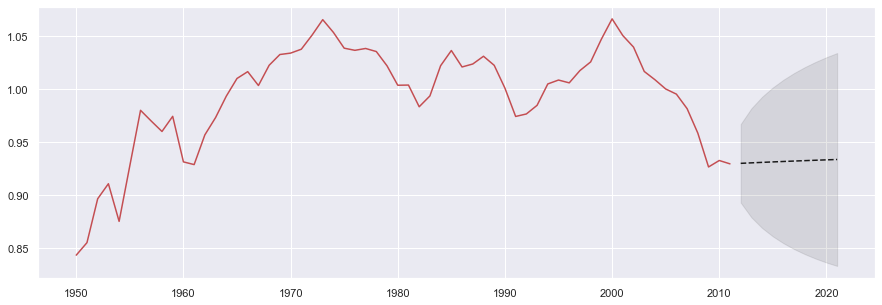

In [17]:
#Plotting the results
fig, ax = plt.subplots(figsize=(15, 5))
# Plot the data (here we are subsetting it to get a better look at the forecasts)
data.plot(ax=ax, c=colors[1])
# Plotting the forecasts
fcast['mean'].plot(ax=ax, style='k--')
ax.fill_between(fcast.index, fcast['mean_ci_lower'], fcast['mean_ci_upper'], color='k', alpha=0.1)

## 2.3. Mexico

In [18]:
#Selecting data
country_df = df[df['isocode']=="MEX"]
country_df = country_df.reset_index()
data = country_df['rtfpna']
first_year = country_df['year'].min()

#Constructing our model and outputing its parameters
mod = sm.tsa.SARIMAX(data, order=(1, 0, 0), trend='c')
res = mod.fit()
#print(res.summary())

#Forecasting
fcast = res.get_forecast(steps=10).summary_frame()

#Adjusting indexes to better visualization
data.index = data.index+first_year
fcast.index = fcast.index+first_year

#Forecast Results
fcast

rtfpna,mean,mean_se,mean_ci_lower,mean_ci_upper
2012,0.956040,0.035611,0.886244,1.025836
2013,0.956309,0.049894,0.858518,1.054100
2014,0.956573,0.060545,0.837908,1.075239
2015,0.956832,0.069271,0.821064,1.092601
2016,0.957087,0.076743,0.806673,1.107500
2017,0.957337,0.083308,0.794056,1.120617
2018,0.957582,0.089175,0.782802,1.132361
2019,0.957822,0.094481,0.772642,1.143002
2020,0.958058,0.099324,0.763386,1.152730
2021,0.958290,0.103775,0.754894,1.161685


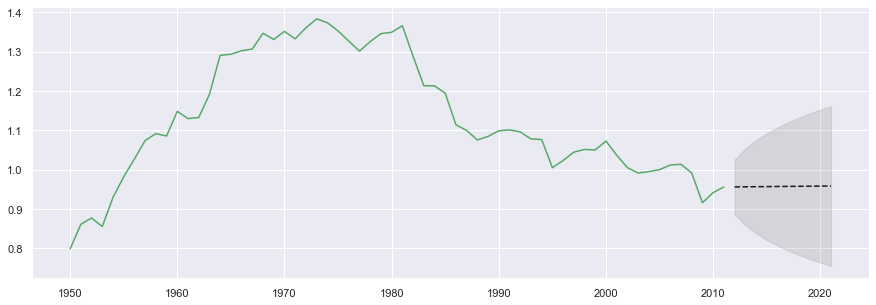

In [19]:
#Plotting the results
fig, ax = plt.subplots(figsize=(15, 5))
# Plot the data (here we are subsetting it to get a better look at the forecasts)
data.plot(ax=ax, c=colors[2])
# Plotting the forecasts
fcast['mean'].plot(ax=ax, style='k--')
ax.fill_between(fcast.index, fcast['mean_ci_lower'], fcast['mean_ci_upper'], color='k', alpha=0.1)

# 3. Can you think about another feature that could be helpful in explaining TFP series? Explain

Considering the available features on pages 2 and 3 of the following URL: https://cran.r-project.org/web/packages/pwt8/pwt8.pdf

#### I would choose the variables that has direct impact upon the underyling concepts of the TFP calculation.
#### The TFP  represents the increase in total production which is in excess of the increase that results from increase in inputs. It results from intangible factors such as technological change, education, research and development, synergies, etc.

### Aditional variables:
#### Outputs: rgdpo and cgdpo
#### Inputs: emp, avh and hc